In [86]:
%pylab inline
pylab.rcParams['figure.figsize'] = (22.0, 10.0)
matplotlib.rcParams.update({'font.size': 25,'legend.fontsize':25,'font.family': 'non-serif'})
rc('axes', linewidth=2)
#rc('text', usetex=True)
from matplotlib.font_manager import FontProperties
from matplotlib.ticker import AutoMinorLocator
!ls
from matplotlib.gridspec import GridSpec

Populating the interactive namespace from numpy and matplotlib
Complete palu data flipped .xlsx  HOT.png	Palu1.ipynb	 PAN.png
hot_000.tgz			  palu_000.tgz	Palu_Output_000  SCH_Input_000
HOT_Output_000			  palu_001.tgz	Palu_Output_001


In [119]:
def remove_nan(arr_l):
    nan_array = np.isnan(arr_l)
    not_nan_array = ~ nan_array
    array2 = arr_l[not_nan_array]
    return array2


def read_data_bulk_var(path_l,fr_lo,fr_hi,tr_name_l):
    if tr_name_l == 'PAN':
        fname_l = ['varfdb_028.out','varfdb_049.out','varfdb_074.out','varfdb_087.out',
               'varfdb_110.out','varfdb_140.out','varfdb_175.out','varfdb_202.out',
               'varfdb_234.out']
    if tr_name_l == 'HOT':
        fname_l = ['varfdb_084.out','varfdb_102.out','varfdb_148.out','varfdb_180.out',
               'varfdb_219.out']#,'varfdb_246.out']
    ve_upper = []
    ve_lower = []
    fd_upper = []
    fd_lower = []

    for i in range(len(fname_l)):
        path_fname = path_l+fname_l[i]
       # print(path_fname)
        data_l = loadtxt(path_fname)
        fd_l = data_l[:,0]
        fr_l = data_l[:,1]
        ve_l = data_l[:,2]
        index_low = argwhere((fr_l>=fr_lo) & (fr_l<=fr_hi))
       # print(index_low[0],index_low[-1],fr_l[index_low[0]],fr_l[index_low[-1]])
        ve_min = ve_l[index_low[-1]]
        ve_max = ve_l[index_low[0]]
        fd_min = fd_l[index_low[-1]]
        fd_max = fd_l[index_low[0]]

      #  print(ve_min,ve_max)
#         fd_l[fr_l<fr_lo] = 'NaN'
#         fd_l[fr_l>fr_hi] = 'NaN'
#         ve_l[fr_l<fr_lo] = 'NaN'
#         ve_l[fr_l>fr_hi] = 'NaN'
        #ve_min = nanmin(ve_l)
        #ve_max = nanmax(ve_l)
        ve_lower.append(ve_min[0])
        ve_upper.append(ve_max[0])
        fd_lower.append(fd_min[0])
        fd_upper.append(fd_max[0])
    ve_lower = array(ve_lower)
    ve_upper = array(ve_upper)
    fd_lower = array(fd_lower)
    fd_upper = array(fd_upper)

    return ve_lower,ve_upper,fd_lower,fd_upper

def read_data_bulk_sin(path_l,tr_name_l):
    if tr_name_l == 'PAN':
        fname_l = ['sinfdb_028.out','sinfdb_049.out','sinfdb_074.out','sinfdb_087.out',
               'sinfdb_110.out','sinfdb_140.out','sinfdb_175.out','sinfdb_202.out',
               'sinfdb_234.out']
    if tr_name_l == 'HOT':
        fname_l = ['sinfdb_084.out','sinfdb_102.out','sinfdb_148.out','sinfdb_180.out',
               'sinfdb_219.out']#,'varfdb_246.out']

    ve_l = []
    fd_l = []
    hi_l = []
    for i in range(len(fname_l)):
        path_fname = path_l+fname_l[i]
      #  print(path_fname)
        data_l = loadtxt(path_fname)
      #  print(data_l)
        ve_l.append(data_l[1])
        fd_l.append(data_l[2])
        hi_l.append(data_l[3])
    ve_l = array(ve_l)
    fd_l = array(fd_l)
    hi_l = array(hi_l)
    
    return ve_l,fd_l,hi_l

# PAN

In [120]:
sinveb_000,fd_000,hi_000 = read_data_bulk_sin('./Palu_Output_000/','PAN')
sinveb_001,fd_001,hi_001 = read_data_bulk_sin('./Palu_Output_001/','PAN')
loc_pit = [28,48,74,87,110,140,175,202,234]
loc_pit_cc = insert(loc_pit,len(loc_pit),280)
hi_000_cc = insert(hi_000,len(hi_000),6.5)
fd_000_cc = insert(fd_000,len(fd_000),0.0)
hi_001_cc = insert(hi_001,len(hi_001),6.5)
fd_001_cc = insert(fd_001,len(fd_001),0.0)
print(hi_000)

[2.99 2.32 4.12 4.32 4.57 5.01 5.44 5.72 6.22]


In [151]:
fr_low = 0.2
fr_high = 0.8
varve_lower_000,varve_upper_000,varfd_lower_000,varfd_upper_000 = read_data_bulk_var('./Palu_Output_000/',fr_low,fr_high,'PAN')
varve_lower_001,varve_upper_001,varfd_lower_001,varfd_upper_001 = read_data_bulk_var('./Palu_Output_000/',fr_low,fr_high,'PAN')
fd_000_cc_lower = insert(varfd_lower_000,len(varfd_lower_000),0.0)
fd_000_cc_upper = insert(varfd_upper_000,len(varfd_upper_000),0.0)


Text(0.5, 0, 'Distance from shore [m]')

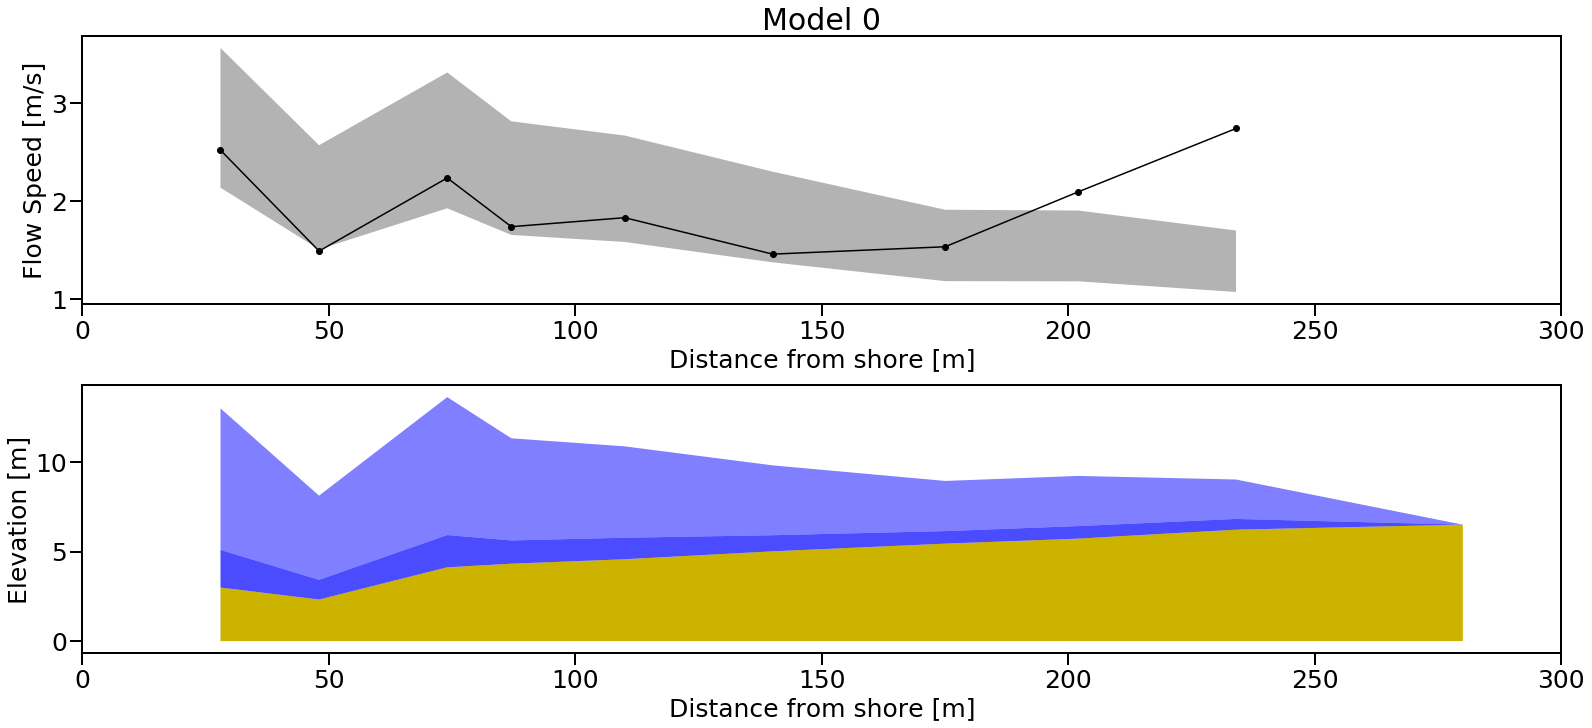

In [152]:

fig = figure(constrained_layout=True)
gs = GridSpec(2, 1,figure=fig)
ax1 = fig.add_subplot(gs[0,0])
#ax2 = fig.add_subplot(gs[0,1])
ax4 = fig.add_subplot(gs[1, :])


al=0.1
li=3

ax1.tick_params(which='both', width=2)
ax1.tick_params(which='major', length=12)
# ax2.tick_params(which='both', width=2)
# ax2.tick_params(which='major', length=12)
ax4.tick_params(which='both', width=2)
ax4.tick_params(which='major', length=12)

ax1.fill_between(loc_pit,varve_lower_000,varve_upper_000,facecolor=(0.7,0.7,0.7))
ax1.plot(loc_pit,sinveb_000,'k-o')
#ax1.set_ylim(0,5)
ax1.set_xlim(0,300)
ax1.set_title('Model 0')
ax1.set_xlabel('Distance from shore [m]')
ax1.set_ylabel('Flow Speed [m/s]')

# ax2.fill_between(loc_pit,varve_lower_001,varve_upper_001,facecolor=(0.7,0.7,0.7))
# ax2.plot(loc_pit,sinveb_001,'k-o')
# #ax2.set_ylim(0,5)
# ax2.set_xlim(0,300)
# ax2.set_title('Model 1')
# ax2.set_xlabel('Distance from shore [m]')


ax4.fill_between(loc_pit_cc,0.0,hi_000_cc,facecolor=(0.8,0.7,0.0))
#ax4.plot(loc_pit_cc,fd_000_cc+hi_000_cc,label='Model 0')
#ax4.plot(loc_pit_cc,fd_001_cc+hi_001_cc,label='Model 1')
ax4.fill_between(loc_pit_cc,hi_000_cc+fd_000_cc_lower,hi_000_cc+fd_000_cc_upper,facecolor='b',alpha=0.5)
ax4.fill_between(loc_pit_cc,hi_000_cc+fd_000_cc_upper,hi_000_cc,facecolor='b',alpha=0.7)


ax4.set_xlim(0,300)
#ax4.set_ylim(0,15)
ax4.set_ylabel('Elevation [m]')
ax4.set_xlabel('Distance from shore [m]')

#ax4.legend(loc=1)

In [146]:
fig.savefig("PAN.png",dpi=200,bbox_inches='tight', transparent=True)

In [115]:
for i in range(len(loc_pit_cc)):
    print(loc_pit_cc[i],fd_000_cc_lower[i],fd_000_cc_upper[i])

28 6.7 1.6
48 3.5 0.9
74 5.8 1.4
87 4.2 1.0
110 3.8 0.9
140 2.9 0.7
175 2.1 0.5
202 2.1 0.5
234 1.7 0.4
280 0.0 0.0


# HOT


In [26]:
sinveb_000,fd_000,hi_000 = read_data_bulk_sin('./HOT_Output_000/','HOT')
#sinveb_001,fd_001,hi_001 = read_data_bulk_sin('./Palu_Output_001/')
loc_pit = [84,102,148,180,219,246]
loc_pit_cc = insert(loc_pit[0:-1],len(loc_pit[0:-1]),280)
hi_000_cc = insert(hi_000,len(hi_000),2.5)
fd_000_cc = insert(fd_000,len(fd_000),0.0)
hi_001_cc = insert(hi_001,len(hi_001),2.5)
fd_001_cc = insert(fd_001,len(fd_001),0.0)
print(hi_000)


[3.15 3.1  1.5  1.8  2.  ]


In [27]:
fr_low = 0.1
fr_high = 0.9
varfd_lower_000,varfd_upper_000 = read_data_bulk_var('./HOT_Output_000/',fr_low,fr_high,'HOT')
#varfd_lower_001,varfd_upper_001 = read_data_bulk_var('./Palu_Output_000/',fr_low,fr_high,'PAN')



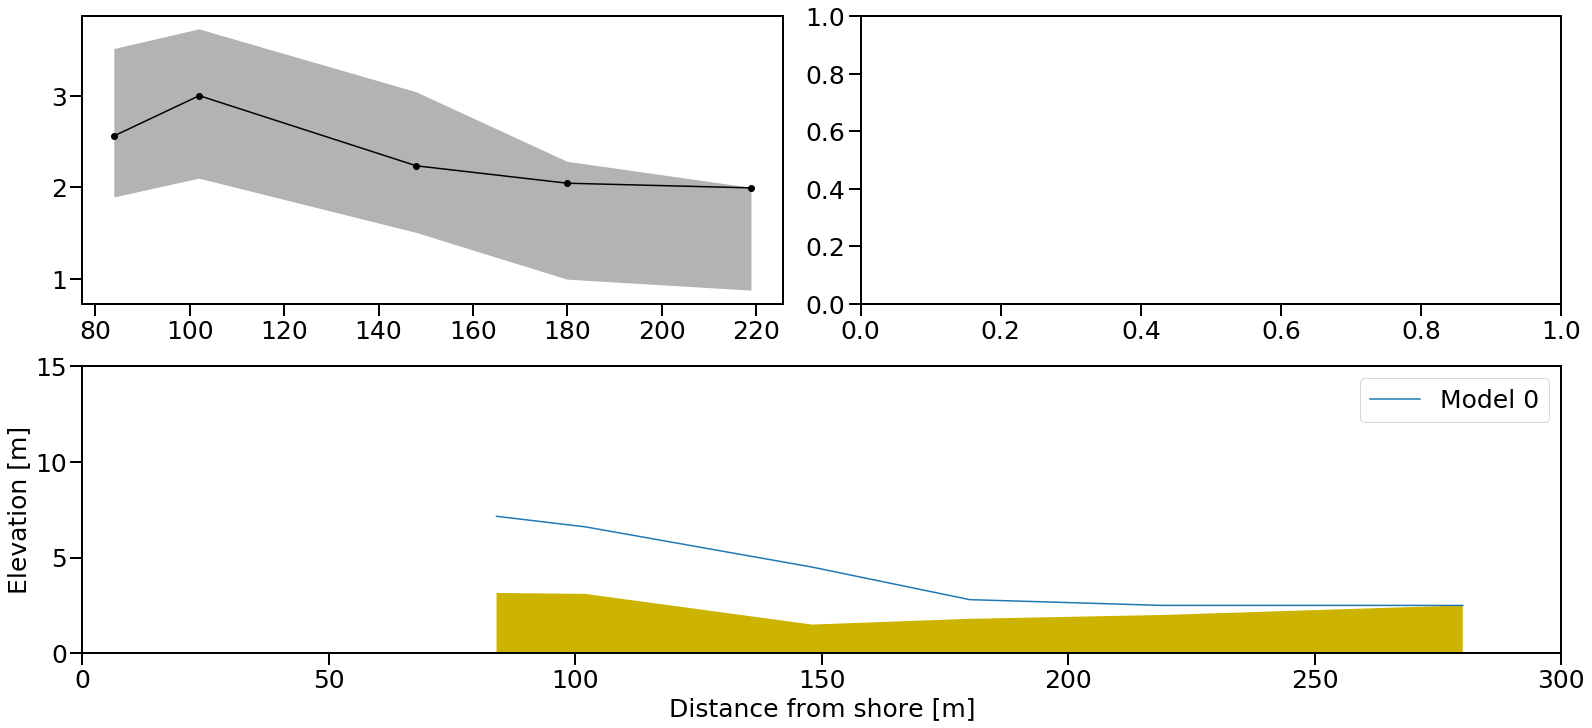

In [28]:
fig = figure(constrained_layout=True)
gs = GridSpec(2, 2,figure=fig)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax4 = fig.add_subplot(gs[1, :])
al=0.1
li=3

ax1.tick_params(which='both', width=2)
ax1.tick_params(which='major', length=12)
ax2.tick_params(which='both', width=2)
ax2.tick_params(which='major', length=12)
ax4.tick_params(which='both', width=2)
ax4.tick_params(which='major', length=12)

ax1.fill_between(loc_pit[0:-1],varfd_lower_000,varfd_upper_000,facecolor=(0.7,0.7,0.7))
ax1.plot(loc_pit[0:-1],sinveb_000,'k-o')

ax4.fill_between(loc_pit_cc,0.0,hi_000_cc,facecolor=(0.8,0.7,0.0))
ax4.plot(loc_pit_cc,fd_000_cc+hi_000_cc,label='Model 0')
#ax4.plot(loc_pit_cc,fd_001_cc+hi_001_cc,label='Model 1')
ax4.set_xlim(0,300)
ax4.set_ylim(0,15)
ax4.set_ylabel('Elevation [m]')
ax4.set_xlabel('Distance from shore [m]')
ax4.legend(loc=1)

In [29]:
fig.savefig("HOT.png",dpi=200,bbox_inches='tight', transparent=True)

In [116]:
for i in range(len(loc_pit_cc)):
    print(loc_pit_cc[i],fd_000_cc[i],fd_001_cc[i])

84 4.0 6.0
102 3.5 6.0
148 3.0 6.0
180 1.0 6.0
219 0.5 4.0
280 0.0 3.0


In [ ]:
deci = 1
if deci ==1:
    single_sdata_1 = loadtxt('./Palu_Output_000/sinfdb_028.out')
    single_sdata_2 = loadtxt('./Palu_Output_000/sinfdb_049.out')
    single_sdata_3 = loadtxt('./Palu_Output_000/sinfdb_074.out')
    single_sdata_4 = loadtxt('./Palu_Output_000/sinfdb_087.out')
    single_sdata_5 = loadtxt('./Palu_Output_000/sinfdb_110.out')
    single_sdata_6 = loadtxt('./Palu_Output_000/sinfdb_140.out')
    single_sdata_7 = loadtxt('./Palu_Output_000/sinfdb_175.out')
    single_sdata_8 = loadtxt('./Palu_Output_000/sinfdb_202.out')
    single_sdata_9 = loadtxt('./Palu_Output_000/sinfdb_234.out')
    print(shape(single_sdata_1))
    single_spit1_fd = [single_sdata_1[0],single_sdata_2[0],single_sdata_3[0],single_sdata_4[0],single_sdata_5[0],single_sdata_6[0],single_sdata_7[0],single_sdata_8[0],single_sdata_9[0]]
    single_spit1_ve = [single_sdata_1[1],single_sdata_2[1],single_sdata_3[1],single_sdata_4[1],single_sdata_5[1],single_sdata_6[1],single_sdata_7[1],single_sdata_8[1],single_sdata_9[1]]

In [ ]:
plot(loc_pit,ve_upper)
plot(loc_pit,ve_lower)
plot(loc_pit,single_spit1_ve)

In [ ]:
plot(loc_pit,ve_upper,label='Froude=0.9')
plot(loc_pit,ve_lower,label='Froude=0.2')
plot(loc_pit,single_spit1_ve,label='Flow Depth from Observations')
legend()
xlabel('Distance from shore [m]')
ylabel('Inverted flow speed [m/s]')

In [ ]:
sdata_1 = loadtxt('output_pit1_sfd.out')
sdata_2 = loadtxt('output_pit2_sfd.out')
sdata_3 = loadtxt('output_pit3_sfd.out')
sdata_4 = loadtxt('output_pit4_sfd.out')
sdata_5 = loadtxt('output_pit5_sfd.out')
spit1_fd = [sdata_1[0],sdata_2[0],sdata_3[0],sdata_4[0],sdata_5[0]]
spit1_ve = [sdata_1[2],sdata_2[2],sdata_3[2],sdata_4[2],sdata_5[2]]

In [ ]:
ssdata_1 = loadtxt('output_pit1_s1fd.out')
ssdata_2 = loadtxt('output_pit2_s1fd.out')
ssdata_3 = loadtxt('output_pit3_s1fd.out')
ssdata_4 = loadtxt('output_pit4_s1fd.out')
ssdata_5 = loadtxt('output_pit5_s1fd.out')
sspit1_fd = [ssdata_1[0],ssdata_2[0],ssdata_3[0],ssdata_4[0],ssdata_5[0]]
sspit1_ve = [ssdata_1[2],ssdata_2[2],ssdata_3[2],ssdata_4[2],ssdata_5[2]]

In [ ]:
# sssdata_1 = loadtxt('output_pit1_s2fd.out')
# sssdata_2 = loadtxt('output_pit2_s2fd.out')
# sssdata_3 = loadtxt('output_pit3_s2fd.out')
# sssdata_4 = loadtxt('output_pit4_s2fd.out')
# sssdata_5 = loadtxt('output_pit5_s2fd.out')
# ssspit1_fd = [sssdata_1[0],sssdata_2[0],sssdata_3[0],sssdata_4[0],sssdata_5[0]]
# ssspit1_ve = [sssdata_1[2],sssdata_2[2],sssdata_3[2],sssdata_4[2],sssdata_5[2]]

In [ ]:
single_sdata_1 = loadtxt('output_pit1_fd_out')
single_sdata_2 = loadtxt('output_pit2_fd_out')
single_sdata_3 = loadtxt('output_pit3_fd_out')
single_sdata_4 = loadtxt('output_pit4_fd_out')
single_sdata_5 = loadtxt('output_pit5_fd_out')
single_spit1_fd = [single_sdata_1[0],single_sdata_2[0],single_sdata_3[0],single_sdata_4[0],single_sdata_5[0]]
single_spit1_ve = [single_sdata_1[2],single_sdata_2[2],single_sdata_3[2],single_sdata_4[2],single_sdata_5[2]]

In [ ]:
fig, ax = subplots(nrows=1,ncols=1,figsize=(15,7.5)) 
al=0.1
li=3

ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=12)

ax.fill_between(loc_pit,ve_lower,ve_upper,facecolor=(0.7,0.7,0.7))
ax.plot(loc_pit,ve_upper,'k-o',lw=li)
ax.plot(loc_pit,ve_lower,'k-o',lw=li)
ax.plot(loc_pit,0.5*(array(ve_lower)+array(ve_upper)),'g-o',label='Mid interval (Fr = 1.5 - 0.2)',lw=li)
ax.plot(loc_pit,spit1_ve,'r-o',label='Flow Depth from Soulsby model(runup)',lw=li)
ax.plot(loc_pit,sspit1_ve,'r--o',label='Flow Depth from Soulsby model(slope)',lw=li)
#ax.plot(loc_pit,ssspit1_ve,'r--o',label='Flow Depth from Soulsby model(slope)',lw=li)
ax.plot(loc_pit,single_spit1_ve,'b-o',label='Flow Depth from file',lw=li)
ax.set_xlabel('Distance from shore [m]')
ax.set_ylabel('Flow Velocity [m/s]')
ylim(0,10)
xlim(100,250)
# ax2 = ax.twinx()
# ax2.tick_params(which='both', width=2)
# ax2.tick_params(which='major', length=12)
# ax2.plot(loc_pit,depo_thick,'g-o',label='Deposit Thickness',lw=li)
# ax2.set_ylabel('Deposit Thickness [m]')
# ax2.set_ylim(0.,0.2)
ax.set_title('Average Velocity based on Boussinesq Velocity')
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax.transAxes,frameon=False)
fig.savefig('chile_2015V2.pdf',dpi=500,bbox_inches='tight')

In [ ]:
plot(loc_pit,fd_upper)
plot(loc_pit,fd_lower)
ylim(0,10)
xlim(100,250)

In [ ]:
data= loadtxt('output_pit11.out')

In [ ]:
plot(data[:,0],data[:,2])
print(data[:,1])

In [ ]:
x=linspace(1.,10,37)

In [ ]:
x